In [1]:
from IPython.display import HTML
from IPython.display import Image

In [2]:
#<img src='WCMS_home_image.png' width="640" height="540" align="center"/>

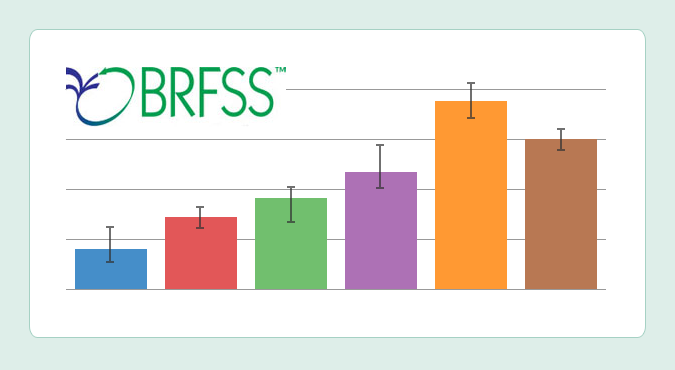

In [3]:
Image("WCMS_home_image.png")

Portfolio Project: Survey Data Analysis Using Python
===================

**By: Pieter Leffers**,

*Starting Date: May 1, 2018*

*Completion Date: ---, 2018*

*Last Updated: -----, 2018*

Project Description
-----------------

Data Source:
-----------
In 1984, the Centers for Disease Control and Prevention (CDC) initiated the state-based Behavioral Risk Factor Surveillance System (BRFSS)–a cross-sectional telephone survey that state health departments conduct monthly over landline telephones and cellular telephones with a standardized questionnaire and technical and methodologic assistance from CDC. BRFSS is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. Respondent data are forwarded to CDC to be aggregated for each state, returned with standard tabulations, and published at year’s end by each state. In 2011, more than 500,000 interviews were conducted in the states, the District of Columbia, and participating U.S. territories and other geographic areas.

The 2016 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2016 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 486,303 records for 2016. The November update includes recoding of responses for a variable (LASTDEN3) in California’s data and a calculated variable (_RFPAP33) set to missing in eight states which did not ask a question (HADHYST2) correctly for eight months. More information on participation is available in the states conducting surveillance, by year table. The data files are provided in ASCII and SAS Transport formats.

**Source:**

**Raked Weighting:**

*Weighting Formula:* https://www.cdc.gov/brfss/annual_data/2016/pdf/weighting_the-data_webpage_content.pdf

*For the time being these links work:*

*Codebook:*
https://www.cdc.gov/brfss/annual_data/2016/pdf/codebook16_llcp.pdf

*Calculated Variables:* https://www.cdc.gov/brfss/annual_data/2016/pdf/2016_calculated_variables_version4.pdf 

*Additional Materials:* https://www.cdc.gov/sleep/pdf/states508/FS_ShortSleepByState_GA_508tagged.pdf

In [4]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
from pandas.core import datetools
import pandas.tseries 
import statsmodels.stats.weightstats as smf
#Turn off annoying warnings
import warnings
warnings.filterwarnings(action='ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/data/'
BRFSS2016=pd.read_csv(location+'2016/BRFSS2016.csv',low_memory=False)

In [6]:
BRFSS2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486303 entries, 0 to 486302
Columns: 276 entries, _STATE to sleeptime
dtypes: float64(226), int64(49), object(1)
memory usage: 1.0+ GB


In [7]:
BRFSS2016.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3,sleeptime
count,486303.000000,486303.000000,4.863030e+05,486303.000000,486303.000000,486303.000000,486303.000000,4.863030e+05,4.863030e+05,253013.0,...,102386.000000,151855.000000,234791.000000,230141.000000,234791.000000,111013.000000,213798.000000,231156.000000,453321.000000,486303.000000
mean,28.973366,6.756479,6.886909e+06,6.738184,14.670964,2016.028758,1113.388978,2.016007e+09,2.016007e+09,1.0,...,1.197693,2.130684,1.904264,1.326513,1.830803,1.975039,1.996010,1.289463,1.975375,0.778465
std,15.959411,3.342713,3.371982e+06,3.370312,8.325667,0.167125,34.053420,6.915870e+03,6.915870e+03,0.0,...,0.398261,2.067062,0.294230,0.468938,0.374927,0.156007,0.063038,0.453514,1.493921,1.009916
min,1.000000,1.000000,1.012017e+06,1.000000,1.000000,2016.000000,1100.000000,2.016000e+09,2.016000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15.000000,4.000000,4.112016e+06,4.000000,8.000000,2016.000000,1100.000000,2.016002e+09,2.016002e+09,1.0,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,27.000000,7.000000,7.112016e+06,7.000000,14.000000,2016.000000,1100.000000,2.016005e+09,2.016005e+09,1.0,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,40.000000,10.000000,1.004202e+07,10.000000,21.000000,2016.000000,1100.000000,2.016009e+09,2.016009e+09,1.0,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,78.000000,12.000000,1.231202e+07,12.000000,31.000000,2017.000000,1200.000000,2.016037e+09,2.016037e+09,1.0,...,2.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,9.000000


Weighting Variable

In [8]:
WeightVar=BRFSS2016['_LLCPWT']
WeightVar.head()

0     767.844566
1     329.659884
2     290.749306
3     211.039206
4    1582.539830
Name: _LLCPWT, dtype: float64

Clustering Variable

In [9]:
ClusterVar=BRFSS2016['_PSU']
ClusterVar.head()

0    2016000001
1    2016000002
2    2016000003
3    2016000004
4    2016000005
Name: _PSU, dtype: int64

Stratum

In [10]:
StrataVar=BRFSS2016['_STSTR']
StrataVar.head()

0    11011
1    11011
2    11011
3    11011
4    11011
Name: _STSTR, dtype: int64

Using Statsmodels I was able to mostly reproduce the results from SAS code, but unfortunately I was unable to properly reproduce the Standard Errors.

**Sleep**

In [11]:
#np.dtype(BRFSS2016['sleeptime'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['sleeptime'])
#one-hot encoding
for x in temp.sleeptime.unique():
    temp[x]=(temp.sleeptime==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'sleeptime':'sleepTime', 0:'zero', 1:'one', 9:'nine'}, inplace=True)   

In [12]:
 #Setup Statsmodels to get Frequency Weights
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([zero,one,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
zeroth,first,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={zeroth: 'Fewer than 7 hrs',first: '7 or more hrs',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
sleepTable=freq_table #Saving frequncy table for later
print('Self-Reported: Average number of hours of sleep in a 24-hour period.')
freq_table

Self-Reported: Average number of hours of sleep in a 24-hour period.


,Percent,Frequency,Weight_freq
Fewer than 7 hrs,34.294376,153525.0,8.715955e+07
7 or more hrs,64.680450,327054.0,1.643861e+08
Not Sure/Refused,1.025174,5724.0,2.605491e+06
Total,100.000000,486303.0,2.541511e+08


In [13]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(228,100,90)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 1 out of 3 adults in the United States <br> report getting 6 hours or less sleep per night.',
                yaxis=dict(title='Sleep in a 24-hour period</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


**Physical Activity**

In [14]:
#np.dtype(BRFSS2016['_TOTINDA'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_TOTINDA'])
#one-hot encoding
for x in temp._TOTINDA.unique():
    temp[x]=(temp._TOTINDA==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'_TOTINDA':'physActive', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [15]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'Had physical activity or exercise',second: 'No physical activity or exercise',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
physactTable=freq_table
print('CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.')
freq_table

CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.


,Percent,Frequency,Weight_freq
Had physical activity or exercise,75.481018,361649.0,1.918359e+08
No physical activity or exercise,24.383464,123860.0,6.197085e+07
Not Sure/Refused,0.135519,794.0,3.444223e+05
Total,100.000000,486303.0,2.541511e+08


In [16]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)','rgb(252,213,180)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 1 out of 4 U.S. adults <br> report not getting physical activity outside their job.',
                yaxis=dict(title='Physical Activity (%) in 30 days</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Children**

In [17]:
#np.dtype(BRFSS2016['_CHLDCNT'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_CHLDCNT'])
#one-hot encoding
for x in temp._CHLDCNT.unique():
    temp[x]=(temp._CHLDCNT==x).astype(int)

#temp.columns
#Index(['_CHLDCNT', 4, 1, 2, 5, 3, 9, 6], dtype='object')
temp.rename(columns={'_CHLDCNT':'ChildCount', 4:'four', 1:'one', 2:'two', 5:'five',3:'three',9:'nine',6:'six'}, inplace=True)

In [18]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,fifth,sixth,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4],freq_table.index[5],freq_table.index[6]
freq_table.rename(index={first: 'One child',second: 'Two children',third: 'Three children',fourth:'Four children',fifth:'Five children',sixth:'Six children',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={7:'Total'},inplace=True)
print('Self-Reported: Number of children in the household.')
freq_table

Self-Reported: Number of children in the household.


,Percent,Frequency,Weight_freq
One child,63.119989,359007.0,1.604202e+08
Two children,14.625321,51115.0,3.717042e+07
Three children,12.571689,43194.0,3.195109e+07
Four children,5.454542,18358.0,1.386278e+07
Five children,1.947746,6735.0,4.950218e+06
Six children,0.978397,3472.0,2.486606e+06
Not Sure/Refused,1.302316,4422.0,3.309852e+06
Total,100.000000,486303.0,2.541511e+08


In [19]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:6]['index'],
               y=graphData.loc[0:6]['Percent'],
               text=round((graphData.loc[0:6]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(158,202,225)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 3 out of 5 U.S. adults <br> report having one child in the household.',
                yaxis=dict(title='Number of Children (%) ',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Age Groupings**

In [20]:
#BRFSS2016['_AGEG5YR'].unique()
#array([ 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype=int64)

#np.dtype(BRFSS2016['_AGEG5YR'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_AGEG5YR'])
#one-hot encoding
for x in temp._AGEG5YR.unique():
    temp[x]=(temp._AGEG5YR==x).astype(int)
    
#temp.columns
#Index(['_AGEG5YR', 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype='object')
temp.rename(columns={'_AGEG5YR':'AgeGroupings', 5:'five', 8:'eight', 13:'thirteen', 11:'eleven',1:'one',10:'ten',12:'twelve',9:'nine',7:'seven',4:'four',3:'three',2:'two',6:'six',14:'fourteen'}, inplace=True)

In [21]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eight
freqTemp = smf.DescrStatsW(temp['eight'], weights=WeightVar)
counts=np.array(pd.Series(temp.eight).value_counts())
eight=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#ten
freqTemp = smf.DescrStatsW(temp['ten'], weights=WeightVar)
counts=np.array(pd.Series(temp.ten).value_counts())
ten=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eleven
freqTemp = smf.DescrStatsW(temp['eleven'], weights=WeightVar)
counts=np.array(pd.Series(temp.eleven).value_counts())
eleven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#twelve
freqTemp = smf.DescrStatsW(temp['twelve'], weights=WeightVar)
counts=np.array(pd.Series(temp.twelve).value_counts())
twelve=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#thirteen
freqTemp = smf.DescrStatsW(temp['thirteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.thirteen).value_counts())
thirteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#fourteen
freqTemp = smf.DescrStatsW(temp['fourteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.fourteen).value_counts())
fourteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,seven,eight,\
nine,ten,eleven,twelve,thirteen,fourteen]),columns=['Percent','Frequency','Weight_freq'])

#Modify index rows
first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth,thirteenth,fourteenth = \
freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],\
freq_table.index[4],freq_table.index[5],freq_table.index[6],freq_table.index[7],\
freq_table.index[8],freq_table.index[9],freq_table.index[10],\
freq_table.index[11],freq_table.index[12],freq_table.index[13]
freq_table.rename(index={first: '18-24',second: '25-29',third: '30-34',fourth:'35-39',fifth:'40-44',sixth:'45-49',seventh:'50-54',eighth:'55-59',ninth:'60-64',tenth:'65-69',eleventh:'70-74',twelfth:'75-79',thirteenth:'80+',fourteenth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={14:'Total'},inplace=True)
print('Self-Reported: Age in five-year age categores.')
freq_table

Self-Reported: Age in five-year age categores.


,Percent,Frequency,Weight_freq
18-24,12.658092,459677.0,3.217068e+07
25-29,8.213207,23034.0,2.087396e+07
30-34,9.135461,25432.0,2.321788e+07
35-39,8.108885,27192.0,2.060882e+07
40-44,7.945350,27195.0,2.019320e+07
45-49,7.412601,33014.0,1.883921e+07
50-54,9.013114,41810.0,2.290693e+07
55-59,8.084989,49799.0,2.054809e+07
60-64,8.292014,54770.0,2.107425e+07
65-69,6.617331,55831.0,1.681802e+07


In [22]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:12]['index'],
               y=graphData.loc[0:12]['Percent'],
               text=round((graphData.loc[0:12]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(204,192,218)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Among 5 year age groupings <br>the largest proportion U.S. adults who responded to the survey <br> are among the age range of 18-24.',
                yaxis=dict(title='Age Groupings (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Mental Health**

In [23]:
#np.dtype(BRFSS2016['_MENT14D'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_MENT14D'])
#one-hot encoding
for x in temp._MENT14D.unique():
    temp[x]=(temp._MENT14D==x).astype(int)

#temp.columns
#Index(['_MENT14D', 1, 2, 3, 9], dtype='object')
temp.rename(columns={'_MENT14D':'MentHealth', 1:'one', 2:'two', 3:'three', 9:'nine'}, inplace=True)

In [24]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3]
freq_table.rename(index={first: '0 Days',second: '1-13 Days',third: '14+ Days',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={4:'Total'},inplace=True)
print('CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.')
freq_table

CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.


,Percent,Frequency,Weight_freq
0 Days,64.735937,329500.0,1.645271e+08
1-13 Days,22.196703,97942.0,5.641317e+07
14+ Days,11.485141,50906.0,2.918962e+07
Not Sure/Refused,1.582219,7955.0,4.021228e+06
Total,100.000000,486303.0,2.541511e+08


In [25]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(196,215,155)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 in 5 U.S. adults report <br> experiencing at least 1 day within the last two weeks feeling their mental health status <br> was "Not good".',
                yaxis=dict(title='Mental Health Status (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Alcohol**

In [26]:
temp=pd.DataFrame(BRFSS2016['_RFBING5'])
#one-hot encoding
for x in temp._RFBING5.unique():
    temp[x]=(temp._RFBING5==x).astype(int)

#temp.columns
#Index(['_RFBING5', 1, 2, 9], dtype='object')
temp.rename(columns={'_RFBING5':'BingDrink', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [27]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for binge drinkers.')
freq_table

CDC Calculated Variable: Calculated variable for binge drinkers.


,Percent,Frequency,Weight_freq
No,76.975496,397997.0,1.956341e+08
Yes,15.616374,59205.0,3.968919e+07
Not Sure/Refused,7.408130,29101.0,1.882785e+07
Total,100.000000,486303.0,2.541511e+08


In [28]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(237,238,178)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 6 of U.S. adults who responded to the survey <br> reported to be binge drinkers.',
                yaxis=dict(title='Binge Drinking (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Smoking**

In [29]:
temp=pd.DataFrame(BRFSS2016['_RFSMOK3'])
#one-hot encoding
for x in temp._RFSMOK3.unique():
    temp[x]=(temp._RFSMOK3==x).astype(int)

#temp.columns
#Index(['_RFSMOK3', 1, 2, 9], dtype='object')
temp.rename(columns={'_RFSMOK3':'TOBUSER', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [30]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for current tobacco use.')
freq_table

CDC Calculated Variable: Calculated variable for current tobacco use.


,Percent,Frequency,Weight_freq
No,79.403604,397533.0,2.018052e+08
Yes,15.473551,68942.0,3.932621e+07
Not Sure/Refused,5.122845,19828.0,1.301977e+07
Total,100.000000,486303.0,2.541511e+08


In [31]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(148,138,84)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 6 of U.S. adults who responded to the survey <br> reported being tobacco smokers.',
                yaxis=dict(title='Tobacco Smokers (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Weight (BMI)**

In [32]:
temp=pd.DataFrame(BRFSS2016['_BMI5CAT'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding
for x in temp._BMI5CAT.unique():
    temp[x]=(temp._BMI5CAT==x).astype(int)

#temp.columns
temp.rename(columns={'_BMI5CAT':'BMICATS', 1:'one', 2:'two', 3:'three',4:'four',0:'zero'}, inplace=True)

In [33]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Underweight',second: 'Normal',third:'Overweight',fourth:'Obese',zero:'Missing/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
#freq_table.loc[len(freq_table)]=last
#freq_table.rename(index={5:'Total'},inplace=True)
print('CDC Calculated Variable: Computed body mass index categories.')
freq_table

CDC Calculated Variable: Computed body mass index categories.


,Percent,Frequency,Weight_freq
Underweight,1.801475,7530.0,4.578469e+06
Normal,30.209211,142110.0,7.677705e+07
Overweight,32.063758,161282.0,8.149041e+07
Obese,26.910368,135765.0,6.839300e+07
Missing/Refused,9.015188,39616.0,2.291220e+07


In [34]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(49,138,155)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 3 of U.S. adults who responded to the survey <br> reported having a BMI that falls within the range of "Overweight".',
                yaxis=dict(title='Body Mass Index (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Chronic Pulmonary Disease (COPD)**

In [35]:
temp=pd.DataFrame(BRFSS2016['CHCCOPD1'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.CHCCOPD1.unique():
    temp[x]=(temp.CHCCOPD1==x).astype(int)

#temp.columns
temp.rename(columns={'CHCCOPD1':'COPD', 1:'one', 2:'two', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [36]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Yes',second: 'No',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={5:'Total'},inplace=True)
print('Self-Reported: Chronic Obstructive Pulmonary Disease.')
freq_table

Self-Reported: Chronic Obstructive Pulmonary Disease.


,Percent,Frequency,Weight_freq
Yes,6.447229,40682.0,1.638571e+07
No,93.113802,443390.0,2.366498e+08
Unsure,0.400390,1980.0,1.017595e+06
Refused,0.038419,249.0,9.764355e+04
BLANK,0.000160,2.0,4.054867e+02
Total,100.000000,486303.0,2.541511e+08


In [37]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(204,192,218)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 15 of U.S. adults who responded to the survey <br> reported they had been diagnosed with COPD.',
                yaxis=dict(title='Chronic Obstructive Pulmonary Disease (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Cerebrovascular Accident (Stroke)**

In [38]:
temp=pd.DataFrame(BRFSS2016['CVDSTRK3'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.CVDSTRK3.unique():
    temp[x]=(temp.CVDSTRK3==x).astype(int)

#temp.columns
temp.rename(columns={'CVDSTRK3':'STROKE', 1:'one', 2:'two', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [39]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Yes',second: 'No',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={5:'Total'},inplace=True)
print('Self-Reported: Cerebrovascular Accident (Stroke)')
freq_table

Self-Reported: Cerebrovascular Accident (Stroke)


,Percent,Frequency,Weight_freq
Yes,3.155634,20843.0,8.020080e+06
No,96.576743,464080.0,2.454509e+08
Unsure,0.232984,1175.0,5.921317e+05
Refused,0.034480,203.0,8.763023e+04
BLANK,0.000160,2.0,4.054867e+02
Total,100.000000,486303.0,2.541511e+08


In [40]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(146,208,80)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 30 of U.S. adults who responded to the survey <br> reported they had been diagnosed with a stroke.',
                yaxis=dict(title='Cerebrovascular Accident (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Diabetes Mellitus**

In [41]:
temp=pd.DataFrame(BRFSS2016['DIABETE3'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.DIABETE3.unique():
    temp[x]=(temp.DIABETE3==x).astype(int)

#temp.columns
temp.rename(columns={'DIABETE3':'Diabetes', 1:'one', 2:'two', 3:'three',  4:'four', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [42]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,three,four,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4],freq_table.index[5],freq_table.index[6]
freq_table.rename(index={first: 'Yes',second: 'Yes, but only during pregnancy',third: 'No',four: 'No, pre-diabetes ',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={7:'Total'},inplace=True)
print('Self-Reported: Diabetes')
freq_table

Self-Reported: Diabetes


,Percent,Frequency,Weight_freq
Yes,10.797701,66053.0,2.744248e+07
"Yes, but only during pregnancy",0.912402,3644.0,2.318880e+06
No,86.267524,406884.0,2.192499e+08
"No, pre-diabetes",1.815194,8858.0,4.613336e+06
Unsure,0.168088,626.0,4.271972e+05
Refused,0.038597,235.0,9.809360e+04
BLANK,0.000495,3.0,1.258557e+03
Total,100.000000,486303.0,2.541511e+08


In [43]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(246,146,196)',
                      'rgb(246,146,196)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 10 of U.S. adults who responded to the survey <br> reported they had been diagnosed with diabetes.',
                yaxis=dict(title='Diabetes (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

Crosstabs 
=============================
2x2 Chi-Square Contingency Tables
---------------------------------------
 
     
 
 

In this section I setup each of the variables of interest and classify the data into dichotomous outcomes (0 and 1) and perform Chi-Square analysis in order help identify variables that would be most useful for modeling. 

***Sleep x Physical Activity***


In [44]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix

chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_TOTINDA','_LLCPWT'])
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['_TOTINDA'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])
#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[1].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[2].T,columns=['second'])
thirdCol=pd.DataFrame(chiSquareTemp[3].T,columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'none',3:'Missing/Refused',4:'Total'},inplace=True)
chiSquareTemp.drop(['none'],axis=0,inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Had exercise', 'second':'No exercise', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Had exercise,No exercise,Missing/Refused,Total
Fewer than 7 hrs,6.293558e+07,2.410588e+07,118079.643523,8.715955e+07
7 or more hrs,1.274982e+08,3.670099e+07,186944.239471,1.643861e+08
Missing/Refused,1.402110e+06,1.163983e+06,39398.388495,2.605491e+06
Total,1.918359e+08,6.197085e+07,344422.271489,2.541511e+08


Here is a table where we can see seven or more hours of sleep grouped by whether the respondant had physical activity within the last month. The table setup ordered itself according to the way the variables were classified. Below I created another table to show things in such a way to make it easier to interpret.


In [45]:
chiSquareTemp_new=chiSquareTemp[['No exercise','Had exercise','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
from scipy.stats import chi2_contingency,chisqprob,chi2
import scipy, scipy.stats

#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum=np.sum(a+c)
col2Sum=np.sum(b+d)
row1Sum=np.sum(a+b)
row2Sum=np.sum(c+d)
totalSum=np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: No exercise', 1:'Control: Had exercise'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: No exercise,Control: Had exercise
Exposed: <7 hrs,2.410588e+07,6.293558e+07
Unexposed: 7+ hrs,3.670099e+07,1.274982e+08


**Significance level: **
    - 10% (0.1) : 2.71
    - 5% (0.05) : 3.84 
    - 1% (0.01) : 6.63

In [47]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,885306.728643,1,0
Likelihood Ratio Chi2,873384.791385,1,0
Phi Coefficient,0.059361,,


In [48]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.331       1.330 1.331   0.000
Log odds ratio    0.286 0.000 0.285 0.286   0.000
Risk ratio        1.200       0.285 0.286   0.000
Log risk ratio    0.182 0.000 0.182 0.182   0.000
-------------------------------------------------


**Explanation:** *Those whom reported regularly having less than 7 hours of sleep nightly were 1.33 times more likely to have not reported exercising within the last month. This demonstrates a positive association between lack of exercise and lack of sleep. However, judging by the phi (.06) we can see the association may not be particularly strong. We will explore this association further later.*

***Sleep x Number of Children***


In [49]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_CHLDCNT','_LLCPWT'])
#Calculate Variable Groups
Child2More=[]
for i in BRFSS2016._CHLDCNT:
    if i==1:
        Child2More.append(0)
    elif i>1 and i<9:
        Child2More.append(1)
    else:
        Child2More.append(9)
chiSquareTemp['Child2More']=Child2More 
chiSquareTemp.drop(['_CHLDCNT'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['Child2More'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[1],columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[0],columns=['second']) #For whatever reason these values got switched

#thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
#chiSquareTemp['third']=thirdCol
chiSquareTemp['third']=chiSquareTemp['first']+chiSquareTemp['second']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'More than 1 Child', 'second':'1 Child', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp


,More than 1 Child,1 Child,Missing/Refused
Fewer than 7 hrs,3.426261e+07,5.176760e+07,8.603021e+07
7 or more hrs,5.552701e+07,1.067390e+08,1.622661e+08
Missing/Refused,6.314966e+05,1.913521e+06,2.545018e+06
Total,9.042111e+07,1.604202e+08,2.508413e+08


For this part I was interested in seeing if there was an association between having more than 1 child in the household and lack of sleep. From the frequency tables above more respondants reported only having 1 child in the household than any other group. This is could be related to more adult respondants being within the 18-24 age range demonstrated above.

In [50]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)
   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: 1+ Children', 1:'Control: 1 Child'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: 1+ Children,Control: 1 Child
Exposed: <7 hrs,3.426261e+07,5.176760e+07
Unexposed: 7+ hrs,5.552701e+07,1.067390e+08


In [51]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,765529.454065,1,0
Likelihood Ratio Chi2,760980.300490,1,0
Phi Coefficient,0.055526,,


In [52]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.272       1.272 1.273   0.000
Log odds ratio    0.241 0.000 0.240 0.241   0.000
Risk ratio        1.168       0.240 0.241   0.000
Log risk ratio    0.156 0.000 0.155 0.156   0.000
-------------------------------------------------


**Explanation:** *We can see those whom have more than 1 child at home have 1.2 times greater likelihood to getting inadequate sleep compared to those whom only have 1 child.*

***Sleep x Age***

In [53]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_AGEG5YR','_LLCPWT'])
#Calculate Variable Groups
FiftyFiveMore=[]
for i in BRFSS2016._AGEG5YR:
    if i>0 and i<10:
        FiftyFiveMore.append(0)
    elif i>9 and i<14:
        FiftyFiveMore.append(1)
    else:
        FiftyFiveMore.append(9)
chiSquareTemp['FiftyFiveMore']=FiftyFiveMore 
chiSquareTemp.drop(['_AGEG5YR'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['FiftyFiveMore'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Less than 65 yrs', 'second':'65 yrs or more', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Less than 65 yrs,65 yrs or more,Missing/Refused,Total
Fewer than 7 hrs,7.285963e+07,1.329250e+07,1.007419e+06,8.715955e+07
7 or more hrs,1.259687e+08,3.638804e+07,2.029356e+06,1.643861e+08
Missing/Refused,1.604687e+06,9.195094e+05,8.129477e+04,2.605491e+06
Total,2.004330e+08,5.060004e+07,3.118070e+06,2.541511e+08


In [54]:
chiSquareTemp_new=chiSquareTemp[['65 yrs or more','Less than 65 yrs','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [55]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case:65+ yrs', 1:'Control: <65 yrs'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case:65+ yrs,Control: <65 yrs
Exposed: <7 hrs,1.329250e+07,7.285963e+07
Unexposed: 7+ hrs,3.638804e+07,1.259687e+08


In [56]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,1.716070e+06,1,0
Likelihood Ratio Chi2,1.772301e+06,1,0
Phi Coefficient,-8.309915e-02,,


In [57]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.632        0.631  0.632   0.000
Log odds ratio   -0.460 0.000 -0.460 -0.459   0.000
Risk ratio        0.730       -0.460 -0.459   0.000
Log risk ratio   -0.315 0.000 -0.315 -0.314   0.000
---------------------------------------------------


**Explanation:** *Unexpectadly there seems to be a negative correlation between age and sleep. I have commonly heard as you get older your quality of sleep diminishes; however, judging by these results that doesn't seem to be the case. We can see a negative correlation (protective effect), where those whom are of age 65 or older are 0.63 times more likely to get inadequate sleep in the last month. It is unlikely we will be using age in our final model.*

***Sleep x Mental Health Status***

In [58]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_MENT14D','_LLCPWT'])
#Calculate Variable Groups
BinMentHlth=[]
for i in BRFSS2016._MENT14D:
    if i==1:
        BinMentHlth.append(0)
    elif i>1 and i<9:
        BinMentHlth.append(1)
    else:
        BinMentHlth.append(9)
chiSquareTemp['BinMentHlth']=BinMentHlth 
chiSquareTemp.drop(['_MENT14D'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BinMentHlth'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'0 Days', 'second':'1+ Days', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,0 Days,1+ Days,Missing/Refused,Total
Fewer than 7 hrs,4.888183e+07,3.673534e+07,1.542377e+06,8.715955e+07
7 or more hrs,1.141795e+08,4.801501e+07,2.191640e+06,1.643861e+08
Missing/Refused,1.465835e+06,8.524446e+05,2.872109e+05,2.605491e+06
Total,1.645271e+08,8.560279e+07,4.021228e+06,2.541511e+08


In [59]:
chiSquareTemp_new=chiSquareTemp[['1+ Days','0 Days','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [60]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: 1+ Days', 1:'Control: 0 Days'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: 1+ Days,Control: 0 Days
Exposed: <7 hrs,3.673534e+07,4.888183e+07
Unexposed: 7+ hrs,4.801501e+07,1.141795e+08


In [61]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,4.406919e+06,1,0
Likelihood Ratio Chi2,4.346759e+06,1,0
Phi Coefficient,1.333542e-01,,


In [62]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.787       1.786 1.788   0.000
Log odds ratio    0.581 0.000 0.580 0.581   0.000
Risk ratio        1.446       0.580 0.581   0.000
Log risk ratio    0.369 0.000 0.368 0.369   0.000
-------------------------------------------------


**Explanation:** *Hitting a little closer to home we can see  from these results those whom responded having 1 day or more within the last month when their mental health was 'not good' are 1.8 times more likely to have responded to having inadequate sleep. Furthermore, judging by the phi (1.34) we see a very large effect or strong association. Although I would have to admit the association here is much stronger than I expected and I am a little concerned with results.*

***Sleep x Binge Drinking***

In [63]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_RFBING5','_LLCPWT'])
#Calculate Variable Groups
BingeDrnk=[]
for i in BRFSS2016._RFBING5:
    if i==1:
        BingeDrnk.append(0)
    elif i==2:
        BingeDrnk.append(1)
    else:
        BingeDrnk.append(9)
chiSquareTemp['BingeDrnk']=BingeDrnk 
chiSquareTemp.drop(['_RFBING5'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BingeDrnk'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'No', 'second':'Yes', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,No,Yes,Missing/Refused,Total
Fewer than 7 hrs,6.605607e+07,1.461877e+07,6.484707e+06,8.715955e+07
7 or more hrs,1.275462e+08,2.488783e+07,1.195210e+07,1.643861e+08
Missing/Refused,2.031858e+06,1.825925e+05,3.910402e+05,2.605491e+06
Total,1.956341e+08,3.968919e+07,1.882785e+07,2.541511e+08


In [64]:
chiSquareTemp_new=chiSquareTemp[['Yes','No','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [65]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: 1+ Days', 1:'Control: 0 Days'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: 1+ Days,Control: 0 Days
Exposed: <7 hrs,1.461877e+07,6.605607e+07
Unexposed: 7+ hrs,2.488783e+07,1.275462e+08


In [66]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,120580.451370,1,0
Likelihood Ratio Chi2,119596.814483,1,0
Phi Coefficient,0.022744,,


In [67]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.134       1.133 1.135   0.000
Log odds ratio    0.126 0.000 0.125 0.127   0.000
Risk ratio        1.085       0.125 0.127   0.000
Log risk ratio    0.081 0.000 0.081 0.082   0.000
-------------------------------------------------


**Explanation:** *According to these results we can see those whom responded to being binge drinkers are 1.13 times more likely to have responded to having experienced inadequate sleep. However, since 1.13 isn't much of a difference and the phi is only (0.023) it would seem as though the association isn't particularly strong even though the pvalue shows significance.*

***Sleep x Tobacco Smoking***

In [68]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_RFSMOK3','_LLCPWT'])
#Calculate Variable Groups
TobSmoke=[]
for i in BRFSS2016._RFSMOK3:
    if i==1:
        TobSmoke.append(0)
    elif i==2:
        TobSmoke.append(1)
    else:
        TobSmoke.append(9)
chiSquareTemp['TobSmoke']=TobSmoke 
chiSquareTemp.drop(['_RFSMOK3'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['TobSmoke'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'No', 'second':'Yes', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,No,Yes,Missing/Refused,Total
Fewer than 7 hrs,6.515087e+07,1.759440e+07,4.414271e+06,8.715955e+07
7 or more hrs,1.348242e+08,2.117259e+07,8.389305e+06,1.643861e+08
Missing/Refused,1.830083e+06,5.592160e+05,2.161924e+05,2.605491e+06
Total,2.018052e+08,3.932621e+07,1.301977e+07,2.541511e+08


In [69]:
chiSquareTemp_new=chiSquareTemp[['Yes','No','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [70]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,1.759440e+07,6.515087e+07
Unexposed: 7+ hrs,2.117259e+07,1.348242e+08


In [71]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,2.351266e+06,1,0
Likelihood Ratio Chi2,2.280404e+06,1,0
Phi Coefficient,9.923992e-02,,


In [72]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.720       1.718 1.721   0.000
Log odds ratio    0.542 0.000 0.541 0.543   0.000
Risk ratio        1.393       0.541 0.543   0.000
Log risk ratio    0.331 0.000 0.331 0.332   0.000
-------------------------------------------------


**Explanation:** * I was most curious to see if there was an association between self reported cigarette smoking use and inadequate sleep and we can see that it certainly seems to be the case that those whom reported being smokers were 1.7 times more likely to have reported experiencing inadequate sleep. Furthermore juding by the phi there seems to be a very strong effect. Once again I I question the phi results, however you can be certain I wil be including tobacco smoking in my final model.*

***Sleep x BMI (Body Mass Index)***

In [73]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_BMI5CAT','_LLCPWT'])
#Calculate Variable Groups
BMIWeightCats=[]
for i in BRFSS2016._BMI5CAT:
    if i<3:
        BMIWeightCats.append(0)
    elif i>2:
        BMIWeightCats.append(1)
    else:
        BMIWeightCats.append(9)
chiSquareTemp['BMIWeightCats']=BMIWeightCats 
chiSquareTemp.drop(['_BMI5CAT'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BMIWeightCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Not Overweight', 'second':'Overweight', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Not Overweight,Overweight,Missing/Refused,Total
Fewer than 7 hrs,2.553090e+07,5.437276e+07,7.255890e+06,8.715955e+07
7 or more hrs,5.507648e+07,9.420024e+07,1.510938e+07,1.643861e+08
Missing/Refused,7.481472e+05,1.310409e+06,5.469345e+05,2.605491e+06
Total,8.135552e+07,1.498834e+08,2.291220e+07,2.541511e+08


In [74]:
chiSquareTemp_new=chiSquareTemp[['Overweight','Not Overweight','Missing/Refused','Total']]
chiSquareTemp=chiSquareTemp_new

In [75]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Overweight', 1:'Control: Not Overweight'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Overweight,Control: Not Overweight
Exposed: <7 hrs,5.437276e+07,2.553090e+07
Unexposed: 7+ hrs,9.420024e+07,5.507648e+07


In [76]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,557805.168163,1,0
Likelihood Ratio Chi2,561880.402567,1,0
Phi Coefficient,0.049335,,


In [77]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.245       1.244 1.246   0.000
Log odds ratio    0.219 0.000 0.219 0.220   0.000
Risk ratio        1.155       0.219 0.220   0.000
Log risk ratio    0.144 0.000 0.144 0.145   0.000
-------------------------------------------------


**Explanation:** *We can see there seems to be an association with being overweight or obese and inadequate sleep; where respondants whom reported being overweight or obese are 1.2 times more likely to have reported having inadequate sleep one or more days within the last two weeks.*

***Sleep x Chronic Pulmonary Disease (COPD)***

In [78]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','CHCCOPD1','_LLCPWT'])
#Calculate Variable Groups
COPDCats=[]
for i in BRFSS2016.CHCCOPD1:
    if i<9:
        COPDCats.append(i)
    else:
        COPDCats.append(9)
        
chiSquareTemp['COPDCats']=COPDCats 
chiSquareTemp.drop(['CHCCOPD1'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['COPDCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Drop row of zeros
chiSquareTemp.drop(['first'],axis=1,inplace=True)
#Drop rows with zeros (2 and 3)
chiSquareTemp.drop(chiSquareTemp.index[2], inplace=True)
chiSquareTemp.drop(chiSquareTemp.index[3], inplace=True)
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'second':'Yes', 'third':'No','fourth':'Total'}, inplace=True)
chiSquareTemp

,Yes,No,Total
Fewer than 7 hrs,7.429061e+06,7.930441e+07,8.673347e+07
7 or more hrs,8.575613e+06,1.551969e+08,1.637725e+08
Total,1.600467e+07,2.345013e+08,2.505060e+08


In [79]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,7.429061e+06,7.930441e+07
Unexposed: 7+ hrs,8.575613e+06,1.551969e+08


In [80]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,1.050766e+06,1,0
Likelihood Ratio Chi2,1.010910e+06,1,0
Phi Coefficient,6.476555e-02,,


In [81]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.695       1.694 1.697   0.000
Log odds ratio    0.528 0.001 0.527 0.529   0.000
Risk ratio        1.373       0.527 0.529   0.000
Log risk ratio    0.317 0.000 0.316 0.317   0.000
-------------------------------------------------


**Explanation:** *Interestingly, those whom have been diagnosed with Chronic Pulmonary Disease were 1.7 times more likely to experience inadequate sleep compared to those who weren't. These results would corraborate with the results from previous research that there is an association between COPD and inadequate sleep one or more days within the last two weeks.*

***Sleep x Cerebrovascular Accident (Stroke)***

In [82]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','CVDSTRK3','_LLCPWT'])
#Calculate Variable Groups
StrokeCats=[]
for i in BRFSS2016.CVDSTRK3:
    if i<3:
        StrokeCats.append(i)
    elif i==7: 
         StrokeCats.append(2)
    else:
        StrokeCats.append(9)
        
chiSquareTemp['StrokeCats']=StrokeCats 
chiSquareTemp.drop(['CVDSTRK3'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['StrokeCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])
#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) 
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
#Drop empty column
chiSquareTemp.drop(['first'],axis=1,inplace=True)
#Drop missing row
chiSquareTemp.drop(chiSquareTemp.index[2], inplace=True)
chiSquareTemp['fourth']=chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'second':'Yes', 'third':'No','fourth':'Total'}, inplace=True)
chiSquareTemp

,Yes,No,Total
Fewer than 7 hrs,3.119597e+06,8.400178e+07,8.712138e+07
7 or more hrs,4.702466e+06,1.596394e+08,1.643419e+08
Total,8.020080e+06,2.460430e+08,2.540631e+08


In [83]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,3.119597e+06,8.400178e+07
Unexposed: 7+ hrs,4.702466e+06,1.596394e+08


In [84]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,97760.303111,1,0
Likelihood Ratio Chi2,95773.569051,1,0
Phi Coefficient,0.019717,,


In [85]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.261       1.259 1.263   0.000
Log odds ratio    0.232 0.001 0.230 0.233   0.000
Risk ratio        1.157       0.230 0.233   0.000
Log risk ratio    0.146 0.000 0.145 0.146   0.000
-------------------------------------------------


**Explanation:** *Similarly we can that there appears to be an association with those whom were diagnosed with a stroke and inadequate sleep; where those whom were diagnosed with a stroke were 1.3 times more likely to experience inadequate sleep one or more days within the last two weeks.*

***Sleep x Diabetes***

In [86]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','DIABETE3','_LLCPWT'])
#Calculate Variable Groups
diabCats=[]
for i in BRFSS2016.DIABETE3:
    if i<3:
        diabCats.append(1)
    elif i>2 and i<9:
        diabCats.append(0)
    else:
        diabCats.append(9)
        
chiSquareTemp['diabCats']=diabCats 
chiSquareTemp.drop(['DIABETE3'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['diabCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={0: 'Fewer than 7 hrs',1: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Yes', 'second':'No', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Yes,No,Missing/Refused,Total
Fewer than 7 hrs,7.596001e+07,1.116248e+07,37051.056322,8.715955e+07
7 or more hrs,1.462853e+08,1.804859e+07,52209.345493,1.643861e+08
Missing/Refused,2.045115e+06,5.502839e+05,10091.751180,2.605491e+06
Total,2.242904e+08,2.976136e+07,99352.152994,2.541511e+08


In [87]:
#observed
a,b,c,d=chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,7.596001e+07,1.116248e+07
Unexposed: 7+ hrs,1.462853e+08,1.804859e+07


In [88]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,185616.007117,1,0
Likelihood Ratio Chi2,183225.250956,1,0
Phi Coefficient,-0.027169,,


In [89]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.840        0.839  0.840   0.000
Log odds ratio   -0.175 0.000 -0.176 -0.174   0.000
Risk ratio        0.894       -0.176 -0.174   0.000
Log risk ratio   -0.112 0.000 -0.112 -0.111   0.000
---------------------------------------------------


**Explanation:** *Interestingly in this particular case we see a protective effect inadequate sleep ; here we can see those who responded they were diagnosed with diabetes were (1-0.84) 0.16 times less likely to experience inadequate sleep within the last two weeks.*

Modeling
======

Logistic Regression
------------------

https://stackoverflow.com/questions/28951982/using-weightings-in-a-poisson-model-using-statsmodels-module

In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


formula = "sleeptime ~ _TOTINDA + _CHLDCNT + + + + "
logit_mod = smf.glm(formula, BRFSS2016, family=sm.families.Poisson(), freq_weights=BRFSS2016['_LLCPWT']).fit()
print(logit_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              sleeptime   No. Observations:               486303
Model:                            GLM   Df Residuals:                254151133
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -2.7774e+08
Date:                Sat, 19 May 2018   Deviance:                   2.1614e+08
Time:                        23:13:30   Pearson chi2:                 3.15e+08
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3381      0.000  -1654.817      0.000      -0.339      -0.338
_TOTINDA       0.0657      0.000    512.862      0.0

In [90]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix

In [91]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','SLEPTIM1','_AGEG5YR','_LLCPWT'])
#Calculate Variable Groups
FiftyFiveMore=[]
for i in BRFSS2016._AGEG5YR:
    if i>0 and i<10:
        FiftyFiveMore.append(0)
    elif i>9 and i<14:
        FiftyFiveMore.append(1)
    else:
        FiftyFiveMore.append(9)
chiSquareTemp['FiftyFiveMore']=FiftyFiveMore 
chiSquareTemp['SLEPTIM1']=chiSquareTemp['SLEPTIM1'].fillna(99).astype(int)

In [92]:
chiSquareTemp.head()

,sleeptime,SLEPTIM1,_AGEG5YR,_LLCPWT,FiftyFiveMore
0,0,5,5,767.844566,0
1,0,6,8,329.659884,0
2,1,9,13,290.749306,1
3,1,7,11,211.039206,1
4,0,6,1,1582.539830,0


In [93]:
BRFSS2016['CHCCOPD1'].unique()

array([  2.,   1.,   7.,   9.,  nan])

In [94]:
#BRFSS2016['SLEPTIM1']
#BRFSS2016['_AGEG5YR']
#BRFSS2016['_LLCPWT]
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','SLEPTIM1','_AGEG5YR','_LLCPWT'])
#Calculate Variable Groups
FiftyFiveMore=[]
for i in BRFSS2016._AGEG5YR:
    if i>0 and i<10:
        FiftyFiveMore.append(0)
    elif i>9 and i<14:
        FiftyFiveMore.append(1)
    else:
        FiftyFiveMore.append(9)
chiSquareTemp['FiftyFiveMore']=FiftyFiveMore 

In [95]:
chiSquareTemp.head()

,sleeptime,SLEPTIM1,_AGEG5YR,_LLCPWT,FiftyFiveMore
0,0,5.0,5,767.844566,0
1,0,6.0,8,329.659884,0
2,1,9.0,13,290.749306,1
3,1,7.0,11,211.039206,1
4,0,6.0,1,1582.539830,0


In [265]:
y = np.array(chiSquareTemp['sleeptime'].fillna(0)).reshape(-1, 1)
X = np.array(chiSquareTemp['FiftyFiveMore'].fillna(0)).reshape(-1, 1)
weights = np.array(chiSquareTemp['_LLCPWT'].fillna(0)).reshape(-1, 1)


In [268]:
from sklearn.linear_model import LogisticRegression
#sklearn.linear_model.SGDClassifier(loss='log', ...)
classifier.fit(X, y, sample_weight=weights)

NameError: name 'classifier' is not defined

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

In [ ]:
# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.bone, edgecolor='black')

In [ ]:
# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'])

In [ ]:
# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['dashed'])

Automatically created module for IPython interactive environment


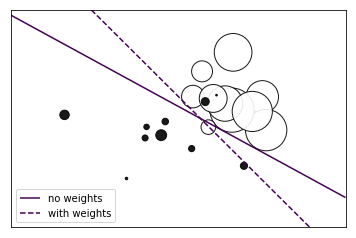

In [267]:
plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()

Interpretation
============================

Conclusion
=============

*Addendum*
=========